Machine Learning

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm 
import pandas.util.testing as tm
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  after removing the cwd from sys.path.


In [3]:
data_df=pd.read_csv('/content/drive/MyDrive/Data/SalesvProduction.csv')


In [4]:
data_df.head()

,Date,Production,Sales
0,1/1/2017,26879.0,26174.45
1,1/2/2017,22456.0,52560.55
2,1/3/2017,17247.0,46779.68
3,1/4/2017,20987.0,44393.35
4,1/5/2017,21905.0,45602.32


In [5]:
# Define x and y
x=data_df.drop(['Date', 'Sales'], axis=1).values # create the independent variables dataframe
y=data_df['Sales'].values # create the dependent variable array 
   

In [6]:
print(x) # display independent variables

[[26879.  ]
 [22456.  ]
 [17247.  ]
 ...
 [20269.  ]
 [25268.01]
 [36212.  ]]


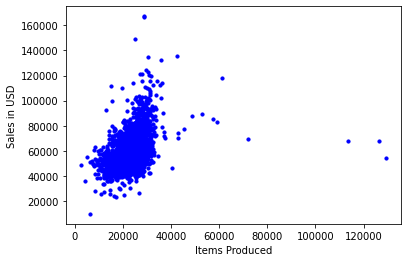

In [7]:
plt.xlabel("Items Produced")
plt.ylabel("Sales in USD")
plt.scatter(data_df.Production,data_df.Sales, c="blue",s=10)

In [8]:
#print(y) to display target variable values
print(y)

[26174.45 52560.55 46779.68 ... 82851.82 82212.81 79115.9 ]


In [9]:
# Split dataset into training and testing datasets
from sklearn.model_selection import train_test_split # get the train test and split function from the sklearn library
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0) # will test on 30% of data


In [10]:
# train the Model on the Training set
from sklearn.linear_model import LinearRegression
ml=LinearRegression() # create the model
ml.fit(x_train,y_train) # fit the model
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression(normalize=False)

In [11]:
# Use trained model to predict the target variable (we know these values, it's how we can tell the accuracy of the model before putting into production)
y_pred = ml.predict(x_test)
print(y_pred)


[ 67025.56091017  61880.60761674  62459.76278357  58343.5860434
  57838.25442613  66356.48146606  57662.73080108  67741.74354714
  64590.11173361  70747.78367364  65552.51560602  70610.00683451
  65307.36489769  62125.75832507  58713.99912894  64264.99265013
  59228.91196385  58712.91789655  47214.38620187  60758.69520486
  64282.32448405  60133.50737229  59709.5786365   55671.55037541
  48993.60225964  65456.16816606  66883.18080446  69160.19196865
  58752.52739964  61957.68556871  49830.75446011  70297.41291822
  68501.80709038  74938.88660627  67479.46440505  61407.43463387
  66525.61404426  68827.23662672  57668.05132082  58441.00401047
  70029.45998244  61486.65364005  50189.38104216  67697.86264088
  57089.99879692  52645.17023381  62628.90606704  66082.42652575
  53388.10534328  60831.49104838  67323.17815218  64834.19191482
  54386.91784272  55121.29944057  54311.98094498  61445.97360985
  56305.30242487  65644.58093753  59855.15961827  56501.20888611
  59416.2542082   59254.92

In [12]:
# input a row of values for the independent variables and see how close it gets to predicting the already known target variable
ml.predict([[61037]])  # the actual value for profit is 41754.42, if you refit the model, the prediction will (should) change

array([102260.89022763])

In [ ]:
# R-Square tells how much of the variation in the dependent variable can be explained by the independent variables used in the regression
# This means, 10% of the variation can be explained
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.10188053659464802

### **Plot Results**

Text(0.5, 1.0, 'Actual vs. Predicted')

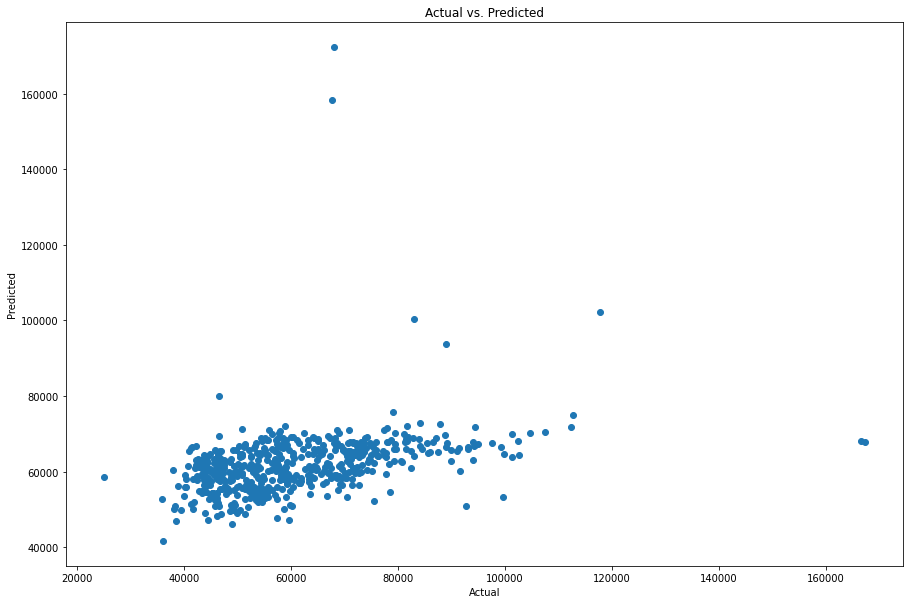

In [ ]:
# Plot the actual values and the predicte values (y)
import matplotlib.pyplot as plt 
plt.figure(figsize=(15,10))
plt.scatter(y_test, y_pred) 
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
# This shows a moderate to low positive correlation

Predicted Values

In [ ]:
#Predicted Values of "y" from the test set
pred_y_df=pd.DataFrame({'Actual Value':y_test, 'Predicted Value':y_pred, 'Difference':y_test - y_pred})
pred_y_df[0:20]
# Especially when the prediction is being made by a glorified adding machine

,Actual Value,Predicted Value,Difference
0,65928.35,67025.560910,-1097.210910
1,51222.42,61880.607617,-10658.187617
2,46043.26,62459.762784,-16416.502784
3,44410.41,58343.586043,-13933.176043
4,60648.42,57838.254426,2810.165574
5,53087.60,66356.481466,-13268.881466
6,48616.99,57662.730801,-9045.740801
7,73098.35,67741.743547,5356.606453
8,50906.17,64590.111734,-13683.941734
9,57906.71,70747.783674,-12841.073674
